In [ ]:
import sys
sys.path.append('..')

import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.datasets import make_blobs

plt.style.use('astroLuSt.styles.LuSt_style')


from astroLuSt.visualization import plots as alvp

# Parallel Coordinate Plot

Generate a dummy dataset

In [ ]:
nsamples = 100

id = np.random.choice(['A', 'B', 'C', 'D'], size=(nsamples,1))
x1 = np.random.rand(*(nsamples,1))
x2 = np.random.randint(50, 10000, (nsamples,1), dtype=int)
x3 = np.random.choice(['a', 'relu', 'sigmoid', 'tanh', np.nan], size=(nsamples,1))
x4 = np.random.randint(-2, 8, (nsamples,1), dtype=int).astype(float)
score = np.random.uniform(0, 100, (nsamples,1))
score[:2]   = np.nan
score[2:3]  = np.inf
score[3:4]  = -np.inf
score[5:7]  = 0
score[7:10] = -1
x4[8]       = np.nan
# score = np.random.uniform(0.3, 0.8, (nsamples,1))
X = {
    '#':id.flatten(),
    'x1':x1.flatten(),
    'x2':x2.flatten(),
    'x3':x3.flatten(),
    'x4':x4.flatten(),
    'score':score.flatten(),
    # 'acc':score.flatten(),
}

df = pl.DataFrame(data=X)
print(df)

usecols = ['x1', 'x2', 'x3', 'x4', 'score']
X = df.select(pl.col(usecols)).to_numpy()



Let's look at the different features/coordinates

In [ ]:
importlib.reload(alvp)


PC = alvp.ParallelCoordinates(
    nancolor='tab:grey', nanfrac=4/256,
    base_cmap='plasma', vmin=0, vmax=1,
    y_margin=0.05,
    xscale_dist='symlog',
    sleep=0.0,
    verbose=3,
)

print(PC)

fig, axs = PC.plot(
    X,
    coordnames=usecols,
    nancolor=None,
    nanfrac=4/256,
    base_cmap=None,
    vmin=None, vmax=None,
    y_margin=None,
    xscale_dist=None,
    ax=None,
    sleep=None,
    verbose=None,
    set_xticklabels_kwargs=dict(color='k', rotation=20),
    pathpatch_kwargs=None,
    set_xticklabels_dist_kwargs=dict(rotation=45),
)

fig.tight_layout()

plt.show()

Plotting right into an existing axis

In [ ]:

#init figure and axes
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

#plot histograms of frist two features
ax1.hist(X[:,0])
ax2.hist(X[:,1])
ax1.set_xlabel(usecols[0])
ax2.set_xlabel(usecols[1])
ax1.set_ylabel('Counts')
ax2.set_ylabel('Counts')


#add parallel coordinates plot in third subplot
fig, axs = PC.plot(
    X,
    coordnames=usecols[:-2],    #some coordinate names missing
    nancolor='m',
    nanfrac=4/256,
    base_cmap='Blues',
    vmin=0,
    vmax=3,                     #distribute cmap differently
    y_margin=0.05,
    xscale_dist=lambda x: x**2, #custom scaling
    ax=ax3,                     #ax to plot into
    sleep=None,
    verbose=None,
    set_xticklabels_kwargs=dict(color='tab:blue', rotation=0),
    pathpatch_kwargs=None,
    set_xticklabels_dist_kwargs=dict(rotation=35),
)

fig.tight_layout()

plt.show()


plt.show()

# LatentSpaceExplorer

Generate a dummy dataset

In [ ]:
class UnravelLatentspace:
    """
        - Generator Class to create polynomials
    """
    def __init__(self) -> None:
        pass

    def predict(self, X_latent:np.ndarray, y=None):

        x = np.linspace(0,1,100)
        X  = np.array([np.polyval(xl, x) for xl in X_latent])

        return X

X_latent, y = make_blobs(n_samples=100, n_features=4, centers=4)


Look at latent dimensions and generated samples (varying 2 latent variables)

In [ ]:
importlib.reload(alvp)

LSE = alvp.LatentSpaceExplorer(
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=1
)

z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
z1 = np.linspace(X_latent[:,1].min()+2,X_latent[:,1].max()-2,5)
fig, axs = LSE.generated_2d(
    generator=UnravelLatentspace(),
    z0=z0, z1=z1,
    zi_f=X_latent.shape[1]-2,
    z0_idx=0, z1_idx=1,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

LSE.plot_dbe(
    X_latent[:,:2], y,
    res=100, k=1,
    ax=axs[-1],
    contourf_kwargs=None,
)

plt.show()

Look at latent dimensions and generated samples (varying 1 latent variable)

In [ ]:
z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
fig, axs = LSE.generated_1d(
    generator=UnravelLatentspace(),
    z0=z0,
    zi_f=X_latent.shape[1]-1,
    z0_idx=0,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

# Corner Plot

Look at pairwise scatter

In [ ]:
importlib.reload(alvp)

CP = alvp.CornerPlot()

fig = plt.figure(figsize=(14,14))
fig, axs = CP.plot(
    X_latent, y, featurenames=None,
    mus=None, sigmas=None, corrmat=None,
    # bins=10,
    bins=np.linspace(-12,12,20),
    cmap='viridis',
    asstandardnormal=False,
    fig=fig,
    sctr_kwargs={'s':30, 'alpha':1, 'vmin':-3},
    hist_kwargs={'density':True},
)


# Venn Diagram

Visualization of a the following query

\begin{align}
    k_1 \lor (k_2 \land \neg  k_3) \lor (k_4\land k_3)
\end{align}

In [ ]:
importlib.reload(alvp)

VD = alvp.VennDiagram(verbose=2)

print(VD)

# fig, axs = VD.plot(
#     query='@1|(@2&(~@3))|(@4&@3)',
#     labels=['@1', '@2', '@3'],
#     # pcolormesh_kwargs={'vmax':1}
#     # pcolormesh_kwargs={'vmin':1}
# )
fig, axs = VD.plot(
    query='(@1&@2)|(@1&@3)|(@1&(~@4))',
    labels=['@1', '@2', '@3'],
    # pcolormesh_kwargs={'vmax':1}
    # pcolormesh_kwargs={'vmin':1}
)

plt.show()

# Attention Weigths in Transformers

MultiHeadAttentionWeights(
    style='matrix',
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f18cbf9bcd0>, cmap_norm=None,
    verbose=0,
)


/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


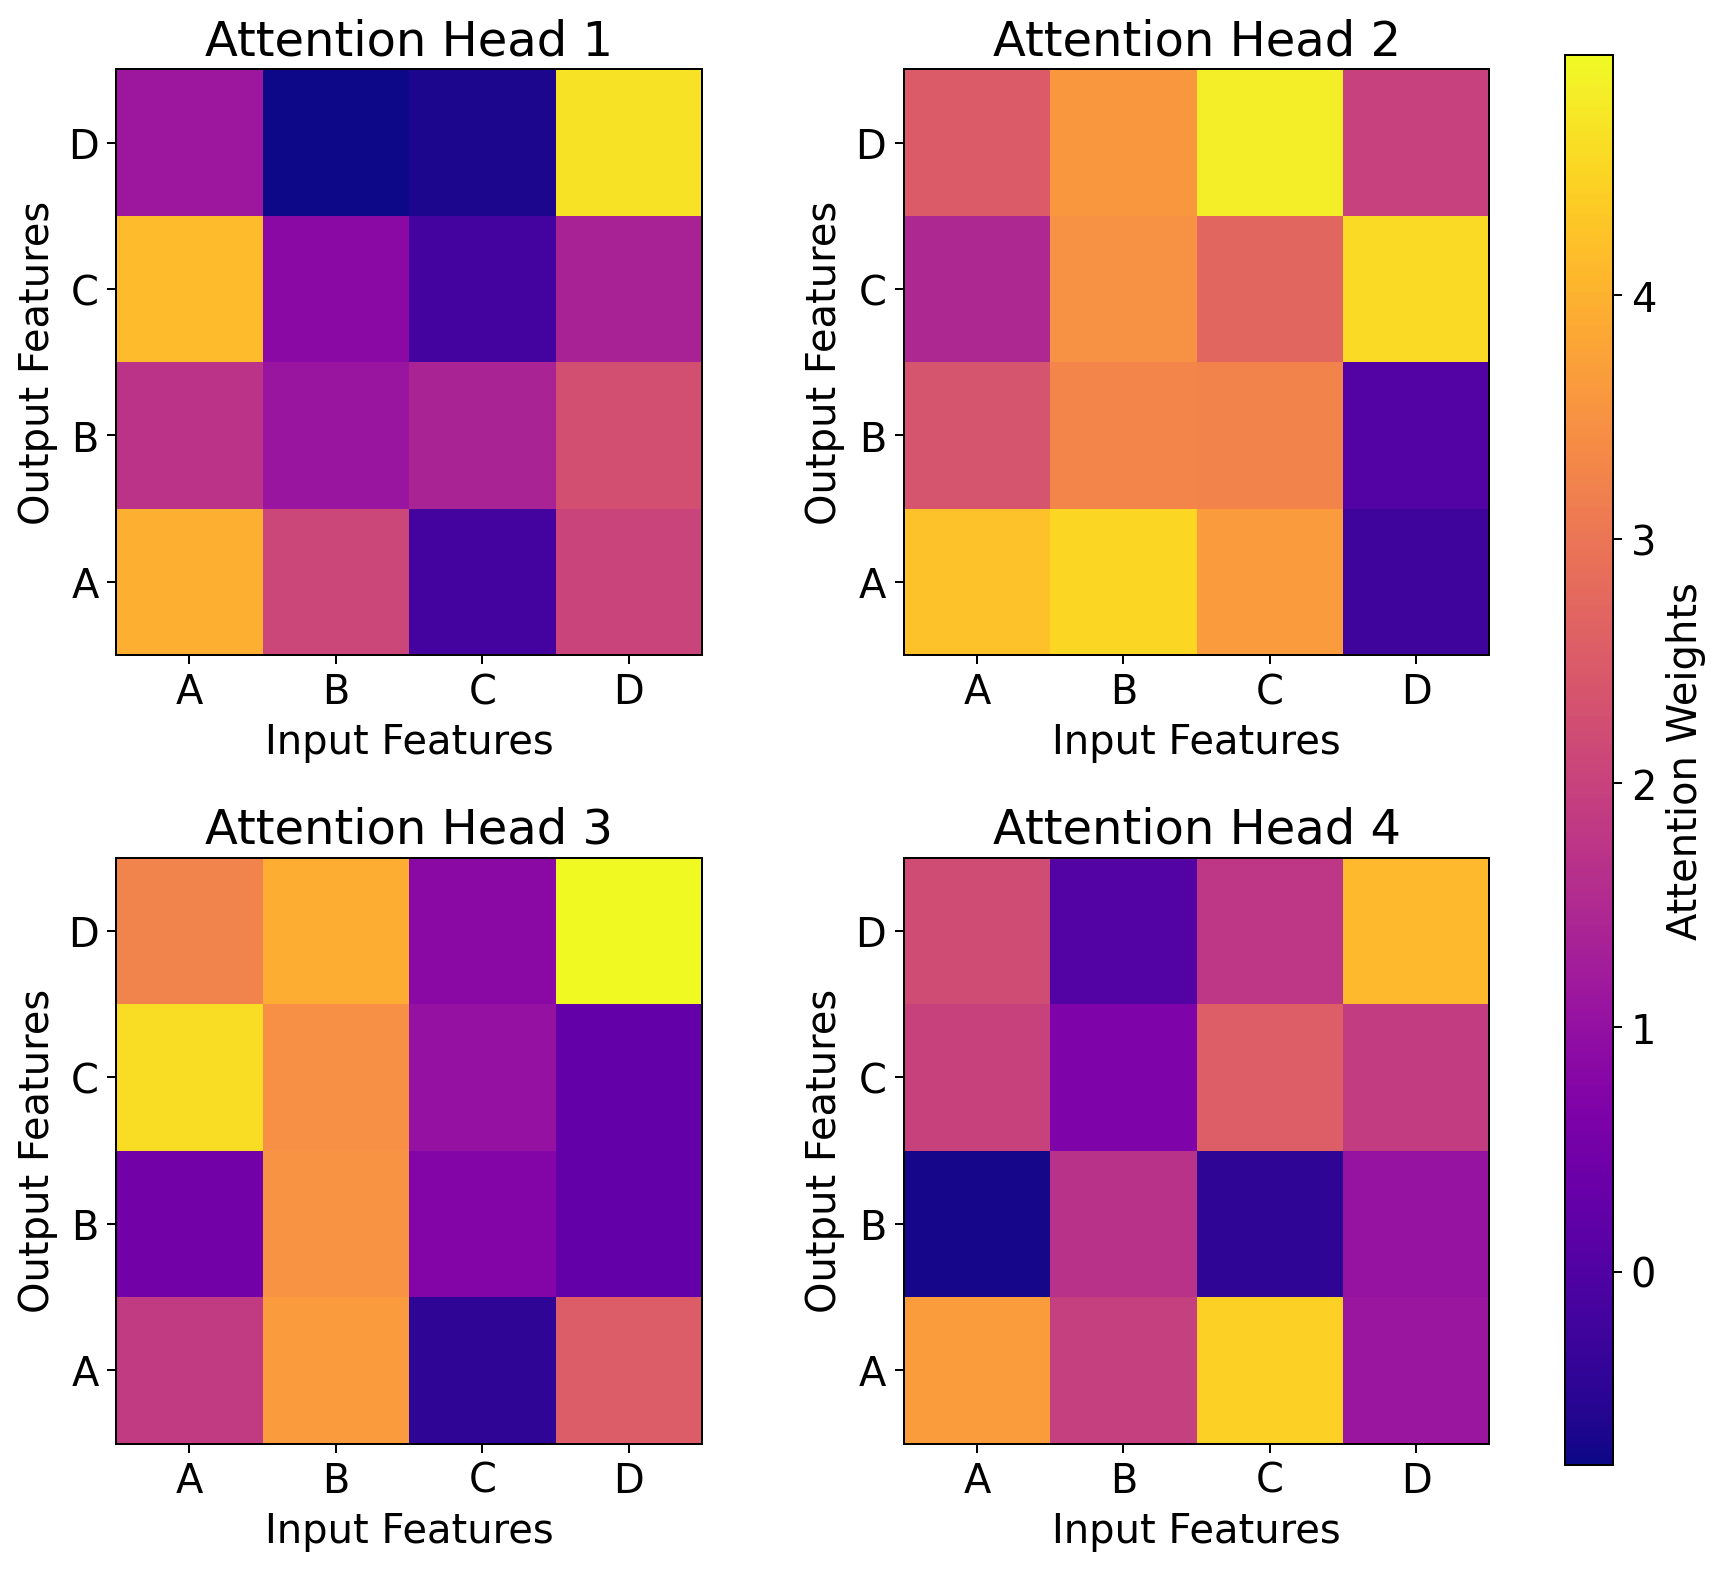

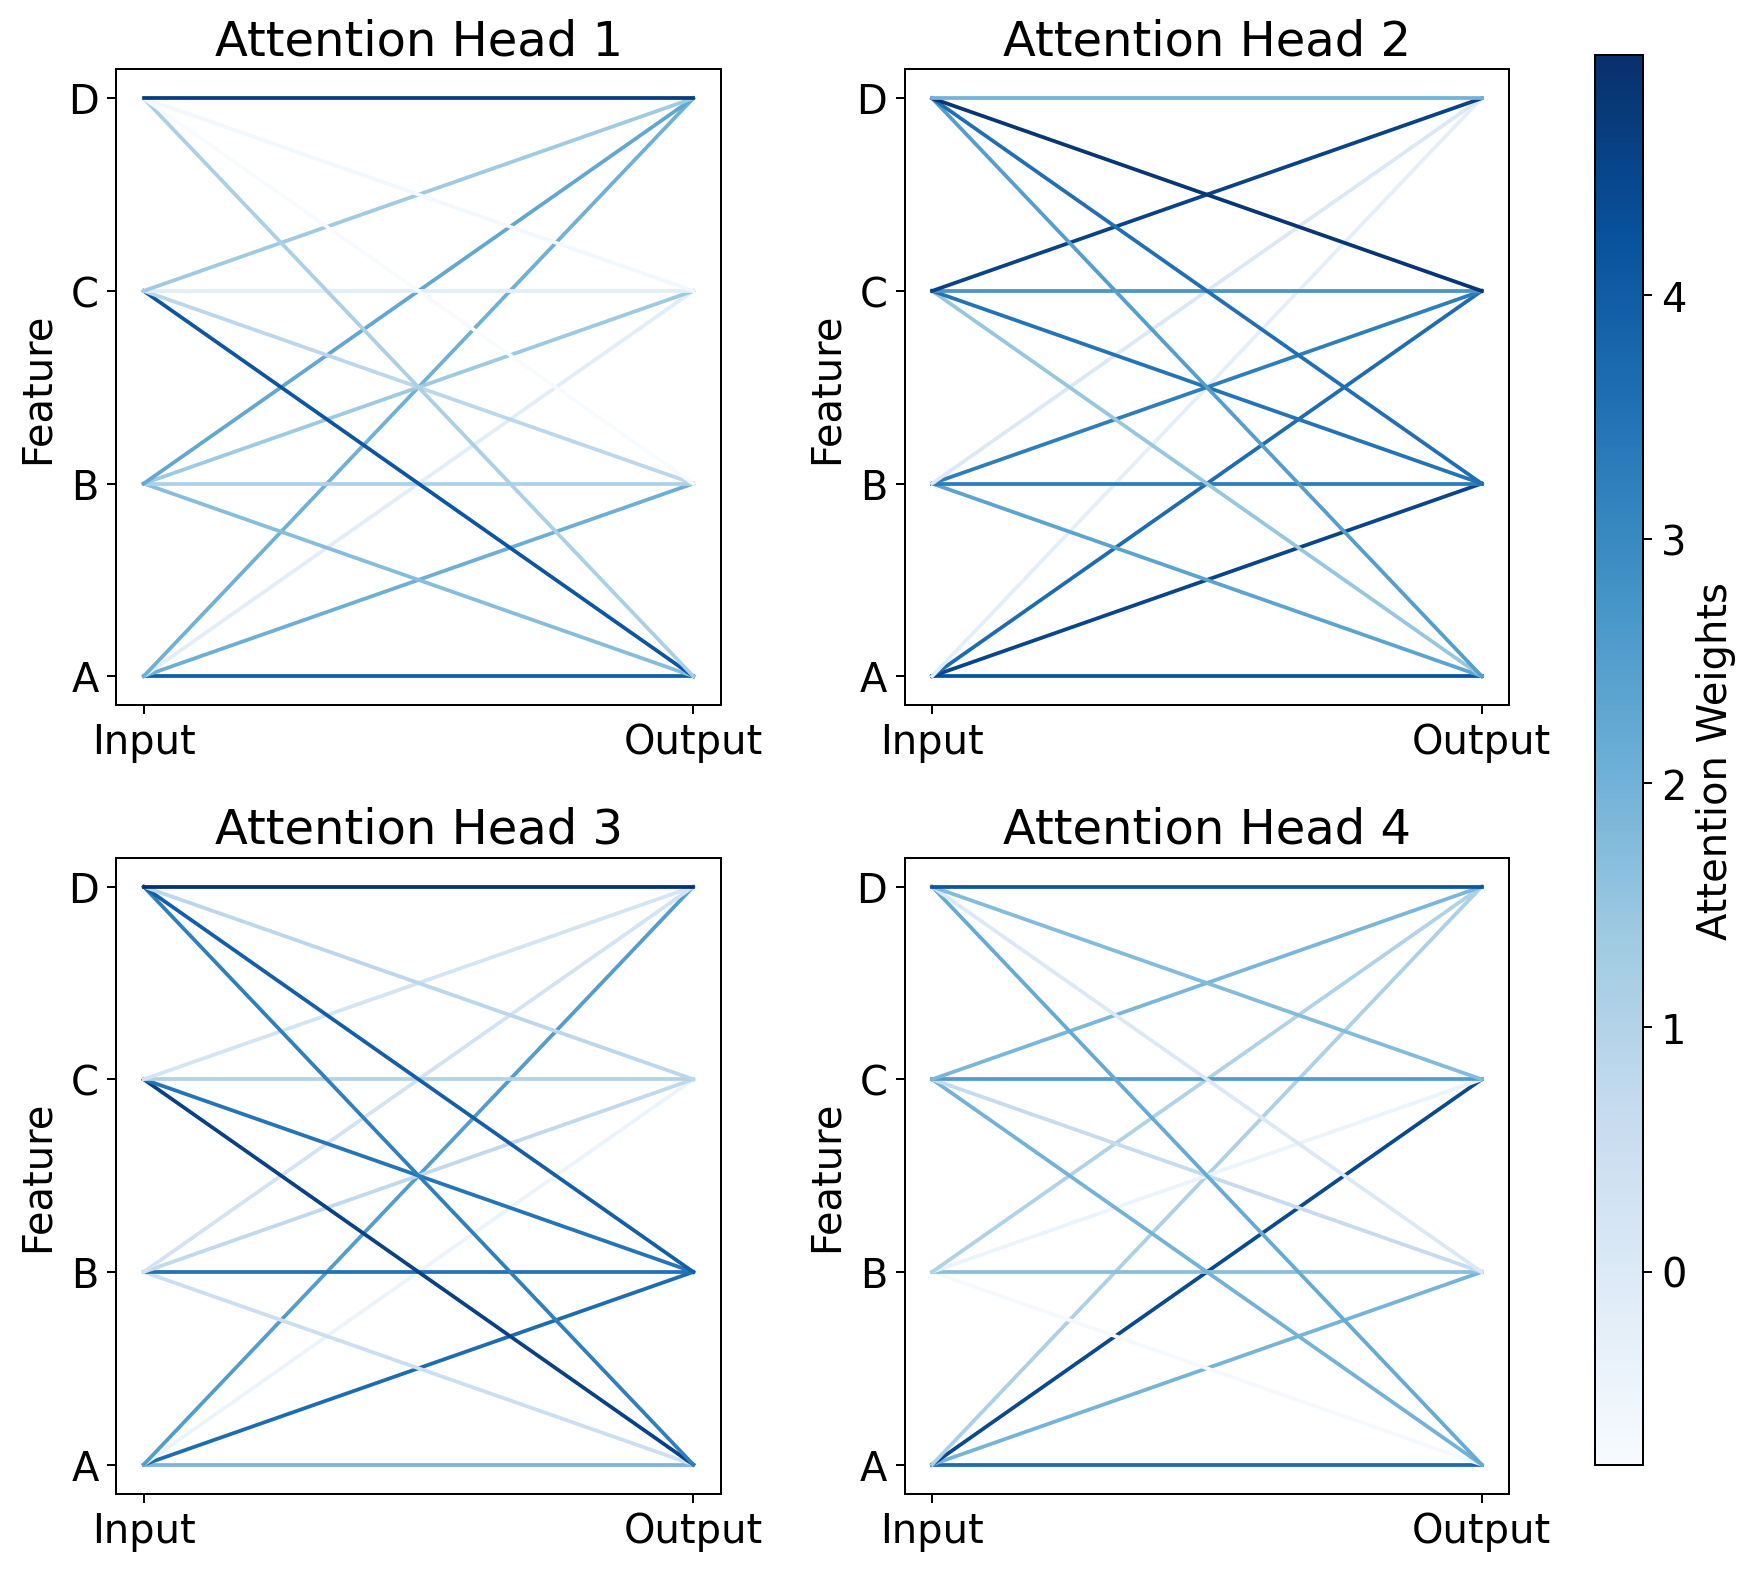

In [102]:
importlib.reload(alvp)

#generate some random MHA weights
nheads  = 4
seq_len = 4
attention_weights = np.random.uniform(-1,5,size=(nheads,seq_len,seq_len))

MHAW = alvp.MultiHeadAttentionWeights(
    style='matrix',
    # style='lines',
    cmap='Blues',
    cmap_norm=None,
    verbose=0
)
print(MHAW)


fig, axs = MHAW.plot(
    attention_weights=attention_weights,
    featurenames=['A', 'B', 'C', 'D'],
    style=None,
    cmap='plasma',
    cmap_norm=None,
    fig=None,
    plot_attention_matrix_kwargs=dict(),
    plot_attention_lines_kwargs=dict(),
)
fig, axs = MHAW.plot(
    attention_weights=attention_weights,
    featurenames=['A', 'B', 'C', 'D'],
    style='lines',
    cmap=None,
    cmap_norm=None,
    fig=None,
    plot_attention_matrix_kwargs=dict(),
    plot_attention_lines_kwargs=dict(),
)


plt.show()